<a href="https://colab.research.google.com/github/feliciakiani/PolitikPedia/blob/main/Machine%20Learning/Text_classification_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [3]:
#import dataset
from google.colab import files
uploaded = files.upload()

Saving preprocessed_indonesian_toxic_tweet_fixed.csv to preprocessed_indonesian_toxic_tweet_fixed.csv


In [4]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

#splitting data
data = pd.read_csv('preprocessed_indonesian_toxic_tweet_fixed.csv')

# Assuming the columns are named as per your specification
columns = [
    'tweet', 'label_HS', 'label_Abusive', 'label_HS_Individual', 'label_HS_Group',
    'label_HS_Religion', 'label_HS_Race', 'label_HS_Physical', 'label_HS_Gender',
    'label_HS_Other', 'label_HS_Weak', 'label_HS_Moderate', 'label_HS_Strong'
]

# Rename columns for clarity
data.columns = columns

# Assuming 'sentence' is the column containing preprocessed sentences
X = data['tweet']

# Assuming other columns are labels
y = data.drop('tweet', axis=1)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create new DataFrames for training and testing data
train_data = pd.DataFrame({'text': X_train})
train_data = pd.concat([train_data, y_train], axis=1)

test_data = pd.DataFrame({'text': X_test})
test_data = pd.concat([test_data, y_test], axis=1)

# Save the training and testing DataFrames to CSV
train_data.to_csv('/content/drive/MyDrive/training_data.csv', index=False)
test_data.to_csv('/content/drive/MyDrive/test_data.csv', index=False)

Mounted at /content/drive


In [5]:
# Print information about the training and testing datasets
print("\nShape of the training dataset:", train_data.shape)
print("Shape of the testing dataset:", test_data.shape)



Shape of the training dataset: (10564, 13)
Shape of the testing dataset: (2642, 13)


In [6]:
print(train_data.head(15))

                                                    text  label_HS  \
2239                    pintar bacot ya lawan nya bu sri         1   
11539  eh nurul kuliah jurus bahasa mandarin bera i k...         0   
6850                                          edan marah         0   
4295        inti dukung prabowo partai komunis indonesia         1   
1042     ayat kaji pengga kepala pancung ujung jari 8 12         1   
2389                            kocok memek enak kali ya         0   
8270          pas lihat goeun kayak asing oh nyata minho         0   
1592   mafia wasit milanisti asing juventini senior a...         0   
2391   lo kritik kritik solusi surat pemberitahuan co...         0   
3592                                               burik         1   
4007                                 ya rezim anti islam         1   
9750                 hantu kak limah 2 amp munafik 2 hem         0   
10632  copy paste nusantara islam freefo newmont indo...         0   
12809  kamis malam r

In [7]:
#optional if u want to download the data
from google.colab import files

# Assuming the paths to the training and testing CSV files
training_data_path = '/content/drive/MyDrive/training_data.csv'
test_data_path = '/content/drive/MyDrive/test_data.csv'

# Download the training dataset
files.download(training_data_path)

# Download the testing dataset
files.download(test_data_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [7]:
import csv

def parse_data_from_file(file_path):
    sentences = []
    labels_HS = []
    labels_Abusive = []
    labels_HS_Individual = []
    labels_HS_Group = []
    labels_HS_Religion = []
    labels_HS_Race = []
    labels_HS_Physical = []
    labels_HS_Gender = []
    labels_HS_Other = []
    labels_HS_Weak = []
    labels_HS_Moderate = []
    labels_HS_Strong = []

    with open(file_path, 'r', encoding='utf-8') as csvfile:
        reader = csv.reader(csvfile)
        next(reader, None)  # Skip the header

        for row in reader:
            sentence = row[0]
            label_HS = int(row[1])
            label_Abusive = int(row[2])
            label_HS_Individual = int(row[3])
            label_HS_Group = int(row[4])
            label_HS_Religion = int(row[5])
            label_HS_Race = int(row[6])
            label_HS_Physical = int(row[7])
            label_HS_Gender = int(row[8])
            label_HS_Other = int(row[9])
            label_HS_Weak = int(row[10])
            label_HS_Moderate = int(row[11])
            label_HS_Strong = int(row[12])

            # Append data to respective lists
            sentences.append(sentence)
            labels_HS.append(label_HS)
            labels_Abusive.append(label_Abusive)
            labels_HS_Individual.append(label_HS_Individual)
            labels_HS_Group.append(label_HS_Group)
            labels_HS_Religion.append(label_HS_Religion)
            labels_HS_Race.append(label_HS_Race)
            labels_HS_Physical.append(label_HS_Physical)
            labels_HS_Gender.append(label_HS_Gender)
            labels_HS_Other.append(label_HS_Other)
            labels_HS_Weak.append(label_HS_Weak)
            labels_HS_Moderate.append(label_HS_Moderate)
            labels_HS_Strong.append(label_HS_Strong)

    return (sentences, labels_HS, labels_Abusive, labels_HS_Individual, labels_HS_Group,
            labels_HS_Religion, labels_HS_Race, labels_HS_Physical, labels_HS_Gender,
            labels_HS_Other, labels_HS_Weak, labels_HS_Moderate, labels_HS_Strong)


In [8]:
#Training data
sentences, labels_HS, labels_Abusive, labels_HS_Individual, labels_HS_Group, labels_HS_Religion, labels_HS_Race, labels_HS_Physical, labels_HS_Gender, labels_HS_Other, labels_HS_Weak, labels_HS_Moderate, labels_HS_Strong = parse_data_from_file('/content/drive/MyDrive/training_data.csv')

#test data
test_sentences, test_labels_HS, test_labels_Abusive, test_labels_HS_Individual, test_labels_HS_Group,test_labels_HS_Religion, test_labels_HS_Race, test_labels_HS_Physical, test_labels_HS_Gender, test_labels_HS_Other, test_labels_HS_Weak, test_labels_HS_Moderate, test_labels_HS_Strong = parse_data_from_file('/content/drive/MyDrive/test_data.csv')

This is a small model that predict only labels_hs

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Vectorize the text data
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(sentences)
X_test_vectorized = vectorizer.transform(test_sentences)

# Step 2: Choose and train the classification model
model = LogisticRegression()
model.fit(X_train_vectorized, labels_HS)  # Assuming you're training for 'labels_HS'

# Step 3: Make predictions on the test data
predictions = model.predict(X_test_vectorized)

# Step 4: Evaluate the model
accuracy = accuracy_score(test_labels_HS, predictions)
report = classification_report(test_labels_HS, predictions)

# Print the evaluation results
print("Accuracy:", accuracy)
print("Classification Report:\n", report)


Accuracy: 0.8391370174110523
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.87      1547
           1       0.83      0.77      0.80      1095

    accuracy                           0.84      2642
   macro avg       0.84      0.83      0.83      2642
weighted avg       0.84      0.84      0.84      2642



training using deep learning method 12 labels failed


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout, SpatialDropout1D
from tensorflow.keras.optimizers import Adam

# Convert labels to numpy arrays
y_train = np.array([labels_HS, labels_Abusive, labels_HS_Individual, labels_HS_Group,
                    labels_HS_Religion, labels_HS_Race, labels_HS_Physical, labels_HS_Gender,
                    labels_HS_Other, labels_HS_Weak, labels_HS_Moderate, labels_HS_Strong])

y_test = np.array([test_labels_HS, test_labels_Abusive, test_labels_HS_Individual, test_labels_HS_Group,
                   test_labels_HS_Religion, test_labels_HS_Race, test_labels_HS_Physical, test_labels_HS_Gender,
                   test_labels_HS_Other, test_labels_HS_Weak, test_labels_HS_Moderate, test_labels_HS_Strong])

# Tokenize the sentences
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(sentences)

X_train = tokenizer.texts_to_sequences(sentences)
X_test = tokenizer.texts_to_sequences(test_sentences)

# Pad sequences to ensure consistent length
X_train_padded = tf.keras.preprocessing.sequence.pad_sequences(X_train, padding='post')
X_test_padded = tf.keras.preprocessing.sequence.pad_sequences(X_test, padding='post')

In [ ]:
# Define the model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128, input_length=X_train_padded.shape[1]))
model.add(SpatialDropout1D(0.5))
model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(SpatialDropout1D(0.5))
model.add(Bidirectional(LSTM(64)))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(12, activation='sigmoid'))  # 12 is the number of output labels

# Compile the model with a lower learning rate
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_padded, y_train.T, epochs=30, batch_size=64, validation_split=0.2)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_padded, y_test.T)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

Epoch 1/30
132/132 [==============================] - 26s 133ms/step - loss: 0.5501 - accuracy: 0.2792 - val_loss: 0.4093 - val_accuracy: 0.8723
Epoch 2/30
132/132 [==============================] - 8s 62ms/step - loss: 0.4199 - accuracy: 0.4280 - val_loss: 0.4016 - val_accuracy: 0.8723
Epoch 3/30
132/132 [==============================] - 5s 39ms/step - loss: 0.4085 - accuracy: 0.4776 - val_loss: 0.4008 - val_accuracy: 0.8723
Epoch 4/30
132/132 [==============================] - 6s 44ms/step - loss: 0.4039 - accuracy: 0.5276 - val_loss: 0.3986 - val_accuracy: 0.8723
Epoch 5/30
132/132 [==============================] - 5s 36ms/step - loss: 0.4007 - accuracy: 0.5631 - val_loss: 0.3943 - val_accuracy: 0.6260
Epoch 6/30
132/132 [==============================] - 4s 30ms/step - loss: 0.3900 - accuracy: 0.5742 - val_loss: 0.3768 - val_accuracy: 0.6118
Epoch 7/30
132/132 [==============================] - 4s 30ms/step - loss: 0.3565 - accuracy: 0.5841 - val_loss: 0.3432 - val_accuracy: 0.72

8 labels :

In [ ]:
import numpy as np
import tensorflow as tf
# Convert labels to numpy arrays
y_train = np.array([labels_HS, labels_Abusive, labels_HS_Individual, labels_HS_Group,
                    labels_HS_Religion, labels_HS_Race, labels_HS_Physical, labels_HS_Gender])

y_test = np.array([test_labels_HS, test_labels_Abusive, test_labels_HS_Individual, test_labels_HS_Group,
                   test_labels_HS_Religion, test_labels_HS_Race, test_labels_HS_Physical, test_labels_HS_Gender])

# Tokenize the sentences
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(sentences)

X_train = tokenizer.texts_to_sequences(sentences)
X_test = tokenizer.texts_to_sequences(test_sentences)

# Pad sequences to ensure consistent length
X_train_padded = tf.keras.preprocessing.sequence.pad_sequences(X_train, padding='post')
X_test_padded = tf.keras.preprocessing.sequence.pad_sequences(X_test, padding='post')

config.json:   0%|          | 0.00/544 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/260k [00:00<?, ?B/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Version 1 test accuracy 87%

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout, SpatialDropout1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Define callbacks
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, save_weights_only=False, monitor='val_loss', mode='min', verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, mode='min', restore_best_weights=True, verbose=1)

# Define a more complex model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=256, input_length=X_train_padded.shape[1]))
model.add(SpatialDropout1D(0.6))
model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(SpatialDropout1D(0.6))
model.add(Bidirectional(LSTM(64)))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(64, activation='relu'))
model.add(Dense(8, activation='sigmoid'))

# Compile the model with an adjusted learning rate
model.compile(optimizer=Adam(learning_rate=0.00001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with callbacks
history = model.fit(X_train_padded, y_train.T, epochs=30, batch_size=128, validation_split=0.2, callbacks=[model_checkpoint, early_stopping])

# Load the best weights from the checkpoint
model.load_weights('best_model.h5')

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_padded, y_test.T)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

AttributeError: ignored

Version 2 coba2

In [ ]:
# Define a tokenizer
tokenizer = AutoTokenizer.from_pretrained("sarahlintang/IndoBERT")

# Convert labels to numpy arrays
y_train = np.array([labels_HS, labels_Abusive, labels_HS_Individual, labels_HS_Group,
                    labels_HS_Religion, labels_HS_Race, labels_HS_Physical, labels_HS_Gender])

y_test = np.array([test_labels_HS, test_labels_Abusive, test_labels_HS_Individual, test_labels_HS_Group,
                   test_labels_HS_Religion, test_labels_HS_Race, test_labels_HS_Physical, test_labels_HS_Gender])

# Tokenize the sentences
X_train = tokenizer(sentences, return_tensors="tf", padding=True, truncation=True)
X_test = tokenizer(test_sentences, return_tensors="tf", padding=True, truncation=True)

# Extract the input IDs from the tokenizer output
X_train_padded = X_train["input_ids"]
X_test_padded = X_test["input_ids"]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


In [ ]:
# Define callbacks
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, save_weights_only=False, monitor='val_loss', mode='min', verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, mode='min', restore_best_weights=True, verbose=1)

# Define a more complex model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.get_vocab()) + 1, output_dim=256, input_length=X_train_padded.shape[1]))
model.add(SpatialDropout1D(0.6))
model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(SpatialDropout1D(0.6))
model.add(Bidirectional(LSTM(64)))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(64, activation='relu'))
model.add(Dense(8, activation='sigmoid'))

# Compile the model with an adjusted learning rate
model.compile(optimizer=Adam(learning_rate=0.00001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with callbacks
history = model.fit(X_train_padded, y_train.T, epochs=30, batch_size=128, validation_split=0.2, callbacks=[model_checkpoint, early_stopping])

# Load the best weights from the checkpoint
model.load_weights('best_model.h5')

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_padded, y_test.T)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

Version 3 just make it sentiment analysis

In [17]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout, SpatialDropout1D, GlobalMaxPooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Convert labels to binary classification (positive or not)
y_train_binary = (np.sum([labels_HS, labels_Abusive, labels_HS_Individual, labels_HS_Group,
                          labels_HS_Religion, labels_HS_Race, labels_HS_Physical, labels_HS_Gender], axis=0) > 0).astype(int)

y_test_binary = (np.sum([test_labels_HS, test_labels_Abusive, test_labels_HS_Individual, test_labels_HS_Group,
                         test_labels_HS_Religion, test_labels_HS_Race, test_labels_HS_Physical, test_labels_HS_Gender], axis=0) > 0).astype(int)

# Tokenize the sentences
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(sentences)

X_train = tokenizer.texts_to_sequences(sentences)
X_test = tokenizer.texts_to_sequences(test_sentences)

# Pad sequences to ensure consistent length
X_train_padded = tf.keras.preprocessing.sequence.pad_sequences(X_train, padding='post')
X_test_padded = tf.keras.preprocessing.sequence.pad_sequences(X_test, padding='post')

# Define callbacks
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, save_weights_only=False, monitor='val_loss', mode='min', verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=8, mode='min', restore_best_weights=True, verbose=1)

model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=300, input_length=X_train_padded.shape[1]))
model.add(SpatialDropout1D(0.7))  # Increase dropout rate
model.add(Bidirectional(LSTM(64, return_sequences=True)))  # Reduce LSTM units
model.add(GlobalMaxPooling1D())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.7))  # Increase dropout rate
model.add(Dense(1, activation='sigmoid'))

# Compile the model with an adjusted learning rate
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with callbacks
history = model.fit(X_train_padded, y_train_binary, epochs=30, batch_size=128, validation_split=0.2, callbacks=[model_checkpoint, early_stopping])

# Load the best weights from the checkpoint
model.load_weights('best_model.h5')

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_padded, y_test_binary)
print(f'Test Accuracy: {accuracy * 100:.2f}%')


Epoch 1/30
67/67 [==============================] - ETA: 0s - loss: 0.6899 - accuracy: 0.5369
Epoch 1: val_loss improved from inf to 0.68719, saving model to best_model.h5
67/67 [==============================] - 19s 177ms/step - loss: 0.6899 - accuracy: 0.5369 - val_loss: 0.6872 - val_accuracy: 0.5603
Epoch 2/30
67/67 [==============================] - ETA: 0s - loss: 0.6871 - accuracy: 0.5505
Epoch 2: val_loss improved from 0.68719 to 0.68445, saving model to best_model.h5
67/67 [==============================] - 9s 137ms/step - loss: 0.6871 - accuracy: 0.5505 - val_loss: 0.6845 - val_accuracy: 0.5603
Epoch 3/30
67/67 [==============================] - ETA: 0s - loss: 0.6848 - accuracy: 0.5558
Epoch 3: val_loss improved from 0.68445 to 0.68126, saving model to best_model.h5
67/67 [==============================] - 6s 88ms/step - loss: 0.6848 - accuracy: 0.5558 - val_loss: 0.6813 - val_accuracy: 0.5603
Epoch 4/30
67/67 [==============================] - ETA: 0s - loss: 0.6813 - accura

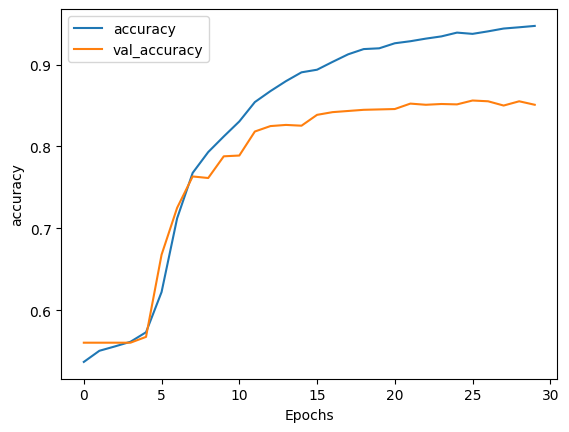

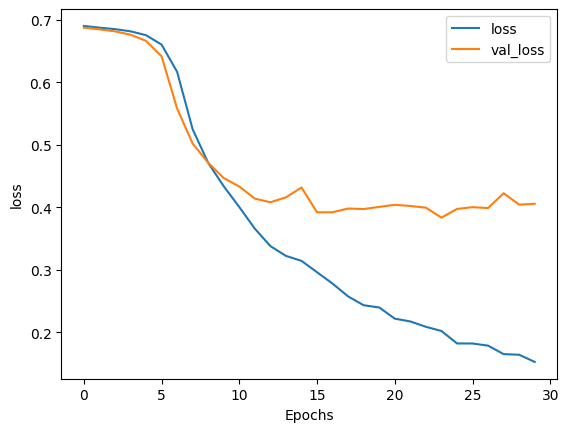

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 56, 300)           3483900   
                                                                 
 spatial_dropout1d_6 (Spati  (None, 56, 300)           0         
 alDropout1D)                                                    
                                                                 
 bidirectional_6 (Bidirecti  (None, 56, 128)           186880    
 onal)                                                           
                                                                 
 global_max_pooling1d_6 (Gl  (None, 128)               0         
 obalMaxPooling1D)                                               
                                                                 
 dense_12 (Dense)            (None, 64)                8256      
                                                      

In [18]:
import matplotlib.pyplot as plt

def show_model_summary(model):
    """
    Display the summary of the model's architecture and parameters.

    Args:
        model (tf.keras.models.Sequential): Keras sequential model.

    Returns:
        None
    """
    model.summary()

def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history[f'val_{metric}'])
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, f'val_{metric}'])
    plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

# Call the function with your model
show_model_summary(model)

In [24]:
from google.colab import drive
from keras.preprocessing.sequence import pad_sequences

drive.mount('/content/drive')

from keras.models import load_model

# Load the best-performing model
#model_path = '/content/drive/MyDrive/my_model.h5'
#model = load_model(model_path)

# Load the best weights from the checkpoint
model.load_weights('best_model.h5')



# Load the best weights from the checkpoint
model.load_weights('best_model.h5')

# Now, for prediction on new text:
new_text = "Produk-produk unggulan kami mendapat tanggapan positif dari pasar kontol presiden memek"
max_length = X_train_padded.shape[1]
print("Max Length:", max_length)

# Tokenize and pad the new text
new_sequence = tokenizer.texts_to_sequences([new_text])
new_padded_sequence = pad_sequences(new_sequence, maxlen=X_train_padded.shape[1], padding='post')

# Make predictions
prediction = model.predict(new_padded_sequence)

# Extract the scalar value from the NumPy array
confidence = prediction[0, 0]

# Threshold for considering a label as positive
threshold = 0.5

# Interpret prediction
predicted_class = 1 if confidence >= threshold else 0

# Convert confidence to a format that can be handled by format method
confidence_str = '{:.4f}'.format(confidence)

print(f"Predicted Class: {predicted_class} (Confidence: {confidence_str})")

#multi text-classification
# Interpret predictions for each label
#labels = ["labels_HS", "labels_Abusive", "labels_HS_Individual", "labels_HS_Group",
#          "labels_HS_Religion", "labels_HS_Race", "labels_HS_Physical", "labels_HS_Gender"]

#for label, prediction in zip(labels, predictions[0]):
#    predicted_class = 1 if prediction >= threshold else 0
#    print(f"{label}: {predicted_class} (Confidence: {prediction:.4f})")





Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Max Length: 56
1/1 [==============================] - 0s 20ms/step
Predicted Class: 1 (Confidence: 0.9820)


In [ ]:
model.save('my_model.h5')

from google.colab import files

files.download('my_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>